1. Wczytaj trzy zarejestrowane sygnały akustyczne, które są w folderze sygnaly_ICA i dodaj je do jednej macierzy. Konieczny będzie zero-padding, bo nie mają takiej samej długości. Padding może być symetryczny, ale nie musi - dobierz go tak jak chcesz.

(Źródło sygnałów: https://data.vision.ee.ethz.ch/cvl/ae_dataset/)

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from scipy.io.wavfile import read as read_wav
from sklearn.preprocessing import StandardScaler
from scipy.io.wavfile import write as write_wav
from os import listdir
import soundfile as sf
import librosa

In [225]:
pliki = listdir('sygnaly_ICA/')

pliki = ['sygnaly_ICA/'+ x for x in pliki]
sr = librosa.load(pliki[0])[1]
wavs = list([librosa.load(x)[0].transpose() for x in pliki])
#max_len = max(map(lambda x: len(x), wavs))
#wavs = np.stack([np.pad(x, (0,max_len-len(x)), constant_values=(0,0)) for x in wavs])
min_len = min(map(lambda x: len(x), wavs))
wavs = np.stack([x[]])

2. Dodaj szum gaussowski, tak jak było pokazane w przykładzie zadaniu 2 z lab 3.

In [226]:
S = np.stack(wavs).T
np.random.seed(0)
S += 0.2 * np.random.normal(size=S.shape) #dodajemy szum gaussowski do sygnału
S = StandardScaler().fit_transform(S) #standaryzacja
S.shape

(387816, 3)

3. Zastosuj algorytm ICA do odtworzenia trzech zaszumionych sygnałów składowych. Na początek zastosuj dowolną macierz miksowania.

In [227]:
A = np.array([[10,1,1], [1,1,1], [1,1,1]])  # macierz miksowania (macierz mieszająca)
X = np.dot(S, A) #iloczyn skalarny
ica = FastICA(n_components=3)
S_reconstructed = ica.fit_transform(X)  # rekonstrukcja sygnałów
A_reconstructed = ica.mixing_  # estymata macierzy miksowania
a =  np.allclose(X, np.dot(S_reconstructed, A_reconstructed.T) + ica.mean_)
print(a)
print(A_reconstructed)

False
[[4456.03740902 4447.64000026 -141.77544211]
 [ 550.6207343   462.0389838  -790.78789479]
 [ 550.6207343   462.0389838  -790.78789479]]


c:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


4. Wyświetl na wykresie:
- sygnał obserwowany (zmiksowane sygnały składowe)
- sygnały oryginalne
- sygnały zrekonstruowane

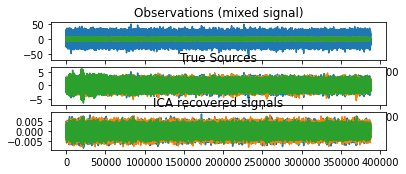

In [228]:
plt.figure()

models = [X, S, S_reconstructed]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']

plt.subplot(511)
plt.plot(models[0])
plt.title(names[0])

plt.subplot(512)
plt.plot(models[1])
plt.title(names[1])

plt.subplot(513)
plt.plot(models[2])
plt.title(names[2])
plt.show()

S_reconstructed = S_reconstructed.transpose()



5. Zapisz zrekonstruowane sygnały do pliku .WAV (np. funkcją write z bilbioteki scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)

In [229]:

for i in range(0,len(S_reconstructed)):
   S_reconstructed[i] = S_reconstructed[i,:] * (2 ** 15 - 1)/ np.max(np.abs(S_reconstructed[i,:]))
   sf.write('signal'+str(i)+'.wav', S_reconstructed[i], sr)
   #write_wav('signal'+str(i)+'.wav',44100, S_reconstructed[i])

6. Odtwórz zapisane pliki .WAV (przy pomocy bilioteki pydub lub w jakimś zewnętrznym programie, np. Audacity). Jeżeli amplitudy są bardzo małe, to trzeba przed zapisaniem do pliku przeskalować je używając kodu poniżej (w razie potrzeby zmieć nazwy zmiennych):

In [230]:
S1_reconstructed = S_reconstructed[:,0] * (2 ** 15 - 1)/ np.max(np.abs(S_reconstructed[:,0]))
#analogicznie dla pozostałych 2 sygnałów

Uwaga: to jest odpowiedni kod, jeżeli zapisujesz do pliku dane typu int16. Jeżeli zapisujesz dane innego typu, to trzeba ten kod odpowiednio zmodyfikować.

7. Sprawdź, czy odtworzone sygnały brzmią tak samo jak oryginalne. Jeżeli nie, to spróbuj dobrać macierz miksowania tak, by rekonstrukcja była lepsza.

8. Gdy uda się uzyskać satysfakcjonujące wyniki, wyświetl zrekonstruowaną macierz miksowania. Czy jest ona taka sama jak ta, która została użyta do miksowania sygnałów oryginalnych?